In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\chris\appdata\local\temp\pip-req-build-fh7tqbl0
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 312470070302f108cc55b67142b6fd083e844904
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\Chris\AppData\Local\Temp\pip-req-build-fh7tqbl0'


In [2]:
# Import all in one cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import InstructionProperties
from qiskit.visualization import plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.primitives import StatevectorEstimator

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

In [3]:
### Save API Token, if needed

%set_env QXToken=bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a
# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a


In [4]:
# qc-grader should be 0.18.11 (or higher)
import qc_grader

qc_grader.__version__


'0.18.14'

In [5]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab4_ex1,
    grade_lab4_ex2,
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6,
    grade_lab4_ex7
)

In [6]:
# Define num_qubits, the number of qubits, for the rest of the Lab
num_qubits = 5

# Load the dictionary
birds_dataset = pd.read_csv('birds_dataset.csv')

# Check if the dataset is loaded correctly - coefficients should be complex numbers
for i in range(2**num_qubits):
    key = 'c%.0f' %i
    birds_dataset[key] = birds_dataset[key].astype(np.complex128)

# Print the dataset
birds_dataset

FileNotFoundError: [Errno 2] No such file or directory: 'birds_dataset.csv'

In [ ]:
list_labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
list_coefficients = birds_dataset.drop(columns=['names']).values.tolist()
print(list_coefficients)

[[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j)], [0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j], [0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j], [0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, 

In [ ]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="bac16a78a963089b5137c432ee3e44bd3d99daf9168de72ee8bf62ef9f73f04b51d6838264865e632e49a563e1b5e3966565f2dc768c8afad3ee6acbf0fe676a",
    set_as_default=True,
    # Use 'overwrite=True' if you're updating your token.
    overwrite=True,
)

In [ ]:
# Submit your answer using following code
grade_lab4_ex1(list_coefficients, list_labels)

Submitting your answer. Please wait...
Failed: 401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken


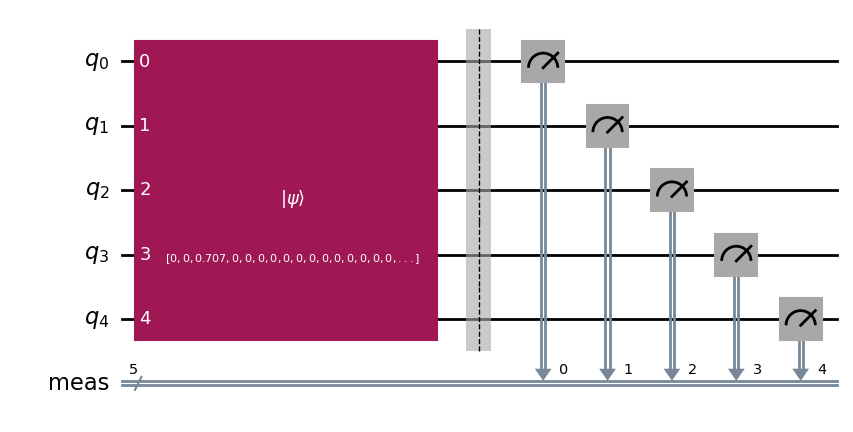

In [ ]:
index_bird = 2 # You can check different birds by changing the index
amplitudes = list_coefficients[index_bird]

# Build the amplitude embedding
qc = QuantumCircuit(5)
qc.initialize(amplitudes, range(num_qubits))
qc.measure_all()

# Draw the amplitude embedding circuit
qc.draw(output="mpl")

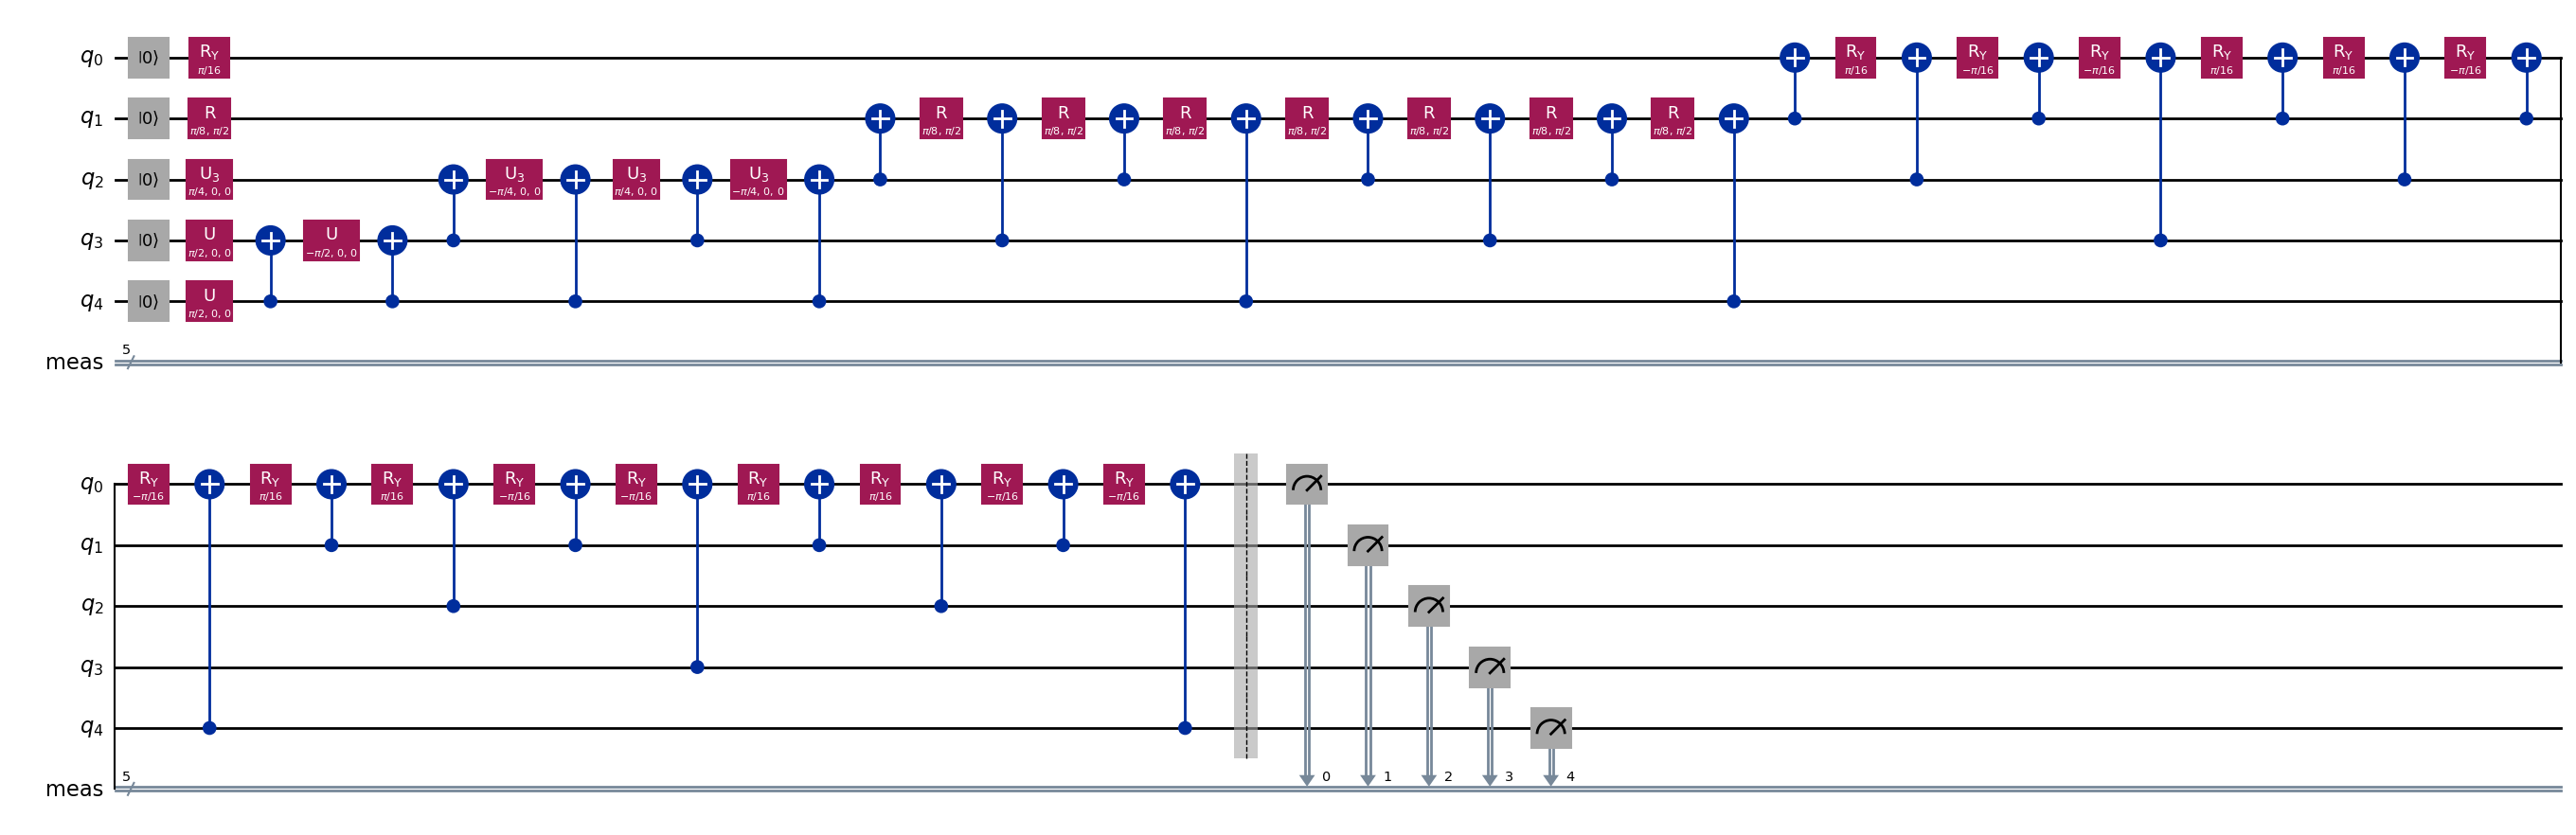

In [ ]:
# Draw the decomposition of the amplitude embedding circuit
qc.decompose(reps=8).draw(output="mpl", fold=40)

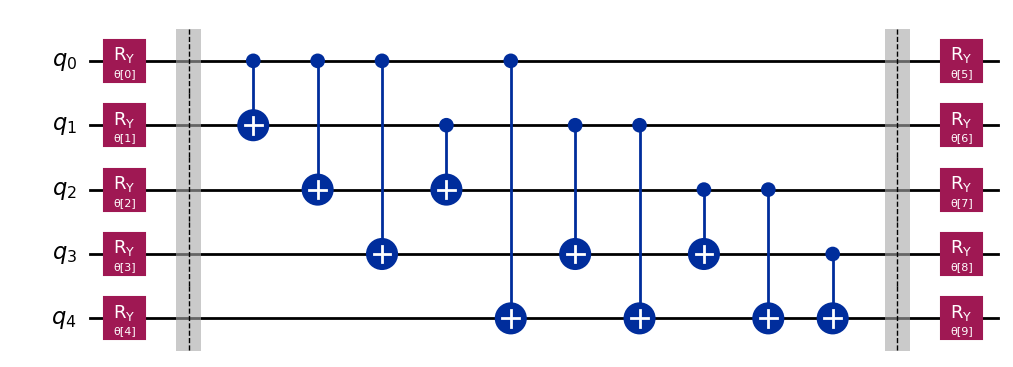

In [ ]:
num_qubits = 5
reps = 1
entanglement = 'full'
ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement, insert_barriers=True)
# Add code here to draw the ansatz circuit
ansatz.decompose().draw('mpl')
# print(ansatz)

In [ ]:
# Submit your answer using following code
grade_lab4_ex2(num_qubits, reps, entanglement)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Define the observable
obs = SparsePauliOp("ZZZZZ")

# Define the estimator and pass manager
estimator = StatevectorEstimator() #To train we use StatevectorEstimator to get the exact simulation
pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3, seed_transpiler=0)

In [ ]:
# Define the cost function
def cost_func(params, list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict):

    """Return cost function for optimization

    Parameters:
        params (ndarray): Array of ansatz parameters
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        estimator (EstimatorV2): Statevector estimator primitive instance
        pm (PassManager): Pass manager
        callback_dict (dict): Dictionary to store callback information

    Returns:
        float: Cost function estimate
    """

    cost = 0
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, params)
        job = estimator.run([pub])
        # Get result
        result = job.result()[0].data.evs
        # Compute cost function (cumulative)
        cost += np.abs(result - label)

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(cost)

    # Print the iterations to screen on a single line
    print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], cost),
        end="\r",
        flush=True,
    )

    return cost

In [ ]:
# Intialize the lists to store the results from different runs
cost_history_list = []
res_list = []

# Retrieve the initial parameters
params_0_list = np.load("params_0_list.npy")

for it, params_0 in enumerate(params_0_list):

    print('Iteration number: ', it)

    # Initialize a callback dictionary
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    # Minimize the cost function using scipy
    res = minimize(
        cost_func,
        params_0,
        args=(list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict),
        method="cobyla", # Classical optimizer
        options={'maxiter': 200}) # Maximum number of iterations

    # Print the results after convergence
    print(res)

    # Save the results from different runs
    res_list.append(res)
    cost_history_list.append(callback_dict["cost_history"])

Iteration number:  0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 4.000011467451044
       x: [ 3.517e+00 -8.492e-04  5.588e-04  3.655e+00  4.717e+00
            1.571e+00  1.804e-03  6.281e+00  2.629e+00  3.145e+00]
    nfev: 200
   maxcv: 0.0
Iteration number:  1
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 2.9486038843201667e-08
       x: [-1.309e-07 -1.571e+00  1.571e+00 -1.104e+00  1.934e+00
            1.571e+00  1.571e+00 -2.869e-05  1.571e+00 -2.305e-05]
    nfev: 200
   maxcv: 0.0
Iteration number:  2
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.113279744917959
       x: [ 4.050e+00  3.146e+00  3.213e+00  3.439e+00  1.043e+00
            2.321e+00  3.105e+00  3.063e+00  3.192e+00  2.586e+00]
    nfev: 145
   maxcv: 0.0
Iteration number:  3
 message: Maximum number of function evaluations has been exceeded.
 success:

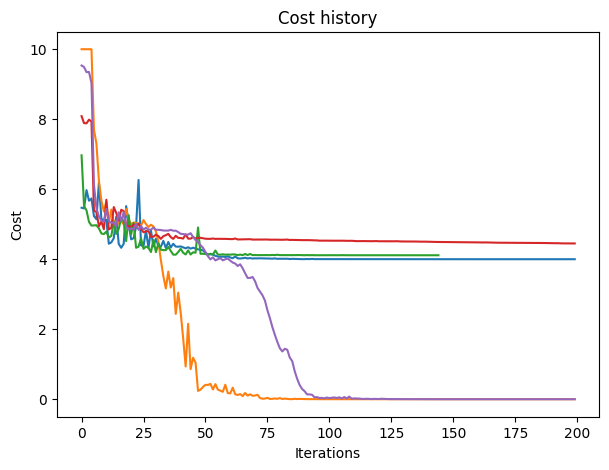

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost history')
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')

# Add your code here
for cost_history in cost_history_list:
    ax.plot(cost_history)

In [ ]:
def test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm):

    """Return the performance of the classifier

    Parameters:
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        list: List of test results
    """
    ### Write your code below here ###
    results_test = []
    cost = 0
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        classifier = qc.compose(ansatz)
        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])
        result = job.result()[0].data.evs
        cost += np.abs(result - label)
        results_test.append(abs(result))

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = opt_params

    ### Don't change any code past this line ###
    return results_test

In [ ]:
def compute_performance(result_list, list_labels):

    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels

    Returns:
        float: Performance of the classifier
    """
    ### Write your code below here ###
    performance_num = np.sum(np.abs(np.array(result_list) - np.array(list_labels)))
    performance = 100 - (100 * (performance_num / 2**5))


    ### Don't change any code past this line ###
    return performance

Performance for trial 0: 93.6004638671875
Performance for trial 1: 99.7222900390625
Performance for trial 2: 90.76080322265625
Performance for trial 3: 86.50665283203125
Performance for trial 4: 99.517822265625


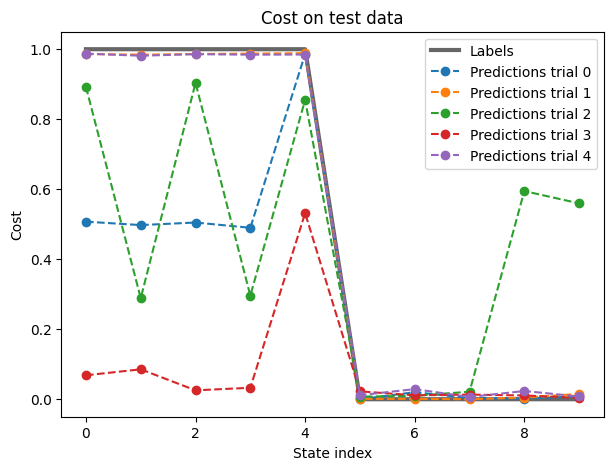

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

for index in range(len(res_list)):
    opt_params = res_list[index].x
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)
    print(f"Performance for trial {index}: {compute_performance(results_test, list_labels)}")
    ax.plot(results_test, 'o--', label='Predictions trial '+str(index))

ax.legend()

In [ ]:
  # Submit your answer using following code
best_result_index = 1
grade_lab4_ex3(res_list[best_result_index])  # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Performance: 100.00% > 90%
Congratulations! 🎉 Your answer is correct.


In [ ]:
fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
  )

In [ ]:
def update_error_rate(backend, error_rates):

    """Updates the error rates of the backend

    Parameters:
        backend (BackendV2): Backend to update
        error_rates (dict): Dictionary of error rates

    Returns:
        None
    """

    default_duration=1e-8
    if "default_duration" in error_rates:
        default_duration = error_rates["default_duration"]

    # Update the 1-qubit gate properties
    for i in range(backend.num_qubits):
        qarg = (i,)
        if "rz_error" in error_rates:
            backend.target.update_instruction_properties('rz', qarg, InstructionProperties(error=error_rates["rz_error"], duration=default_duration))
        if "x_error" in error_rates:
            backend.target.update_instruction_properties('x', qarg, InstructionProperties(error=error_rates["x_error"], duration=default_duration))
        if "sx_error" in error_rates:
            backend.target.update_instruction_properties('sx', qarg, InstructionProperties(error=error_rates["sx_error"], duration=default_duration))
        if "measure_error" in error_rates:
            backend.target.update_instruction_properties('measure', qarg, InstructionProperties(error=error_rates["measure_error"], duration=default_duration))

    # Update the 2-qubit gate properties (CX gate) for all edges in the chosen coupling map
    if "cx_error" in error_rates:
        for edge in backend.coupling_map:
            backend.target.update_instruction_properties('cx', tuple(edge), InstructionProperties(error=error_rates["cx_error"], duration=default_duration))

In [ ]:
error_rates = {
  "default_duration": 1e-8,
  "rz_error": 1e-8,
  "x_error": 1e-8,
  "sx_error": 1e-8,
  "measure_error": 1e-8,
  "cx_error": 1e-8
}

update_error_rate(fake_backend, error_rates)

Performance for run 4: 84.3841552734375
Performance for run 4: 84.320068359375
Performance for run 4: 84.320068359375
Performance for run 4: 84.3109130859375


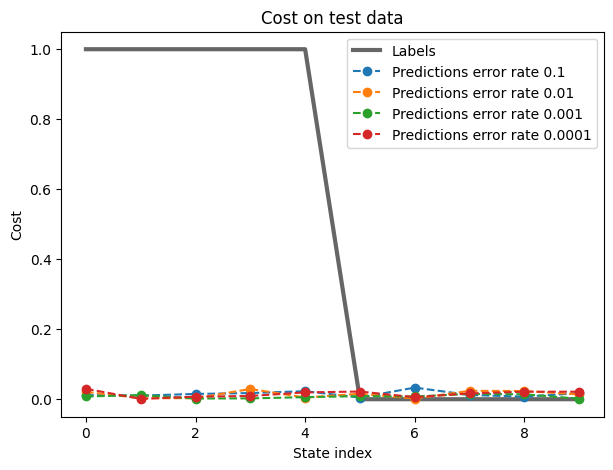

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

error_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]

fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
  )

for error_rate_value in error_rate_list:
    error_rates = {
        "rz_error": error_rate_value,
        "cx_error": error_rate_value,
        "sx_error": 1e-8,
        "measure_error": 1e-8,
        "default_duration": 1e-8,
        "x_error": 1e-8
    }

    update_error_rate(fake_backend, error_rates)

    estimator = Estimator(fake_backend)
    pm = generate_preset_pass_manager(backend=fake_backend, optimization_level=3, seed_transpiler=0)

    opt_params = res_list[4].x
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)

    print(f"Performance for run {index}: {compute_performance(results_test, list_labels)}")
    ax.plot(results_test, 'o--', label='Predictions error rate '+str(error_rate_value))

ax.legend()

In [ ]:
# Submit your answer using following code
grade_lab4_ex4(fake_backend) # Expected answer type: BackendV2

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

Depth of two-qubit gates:  39


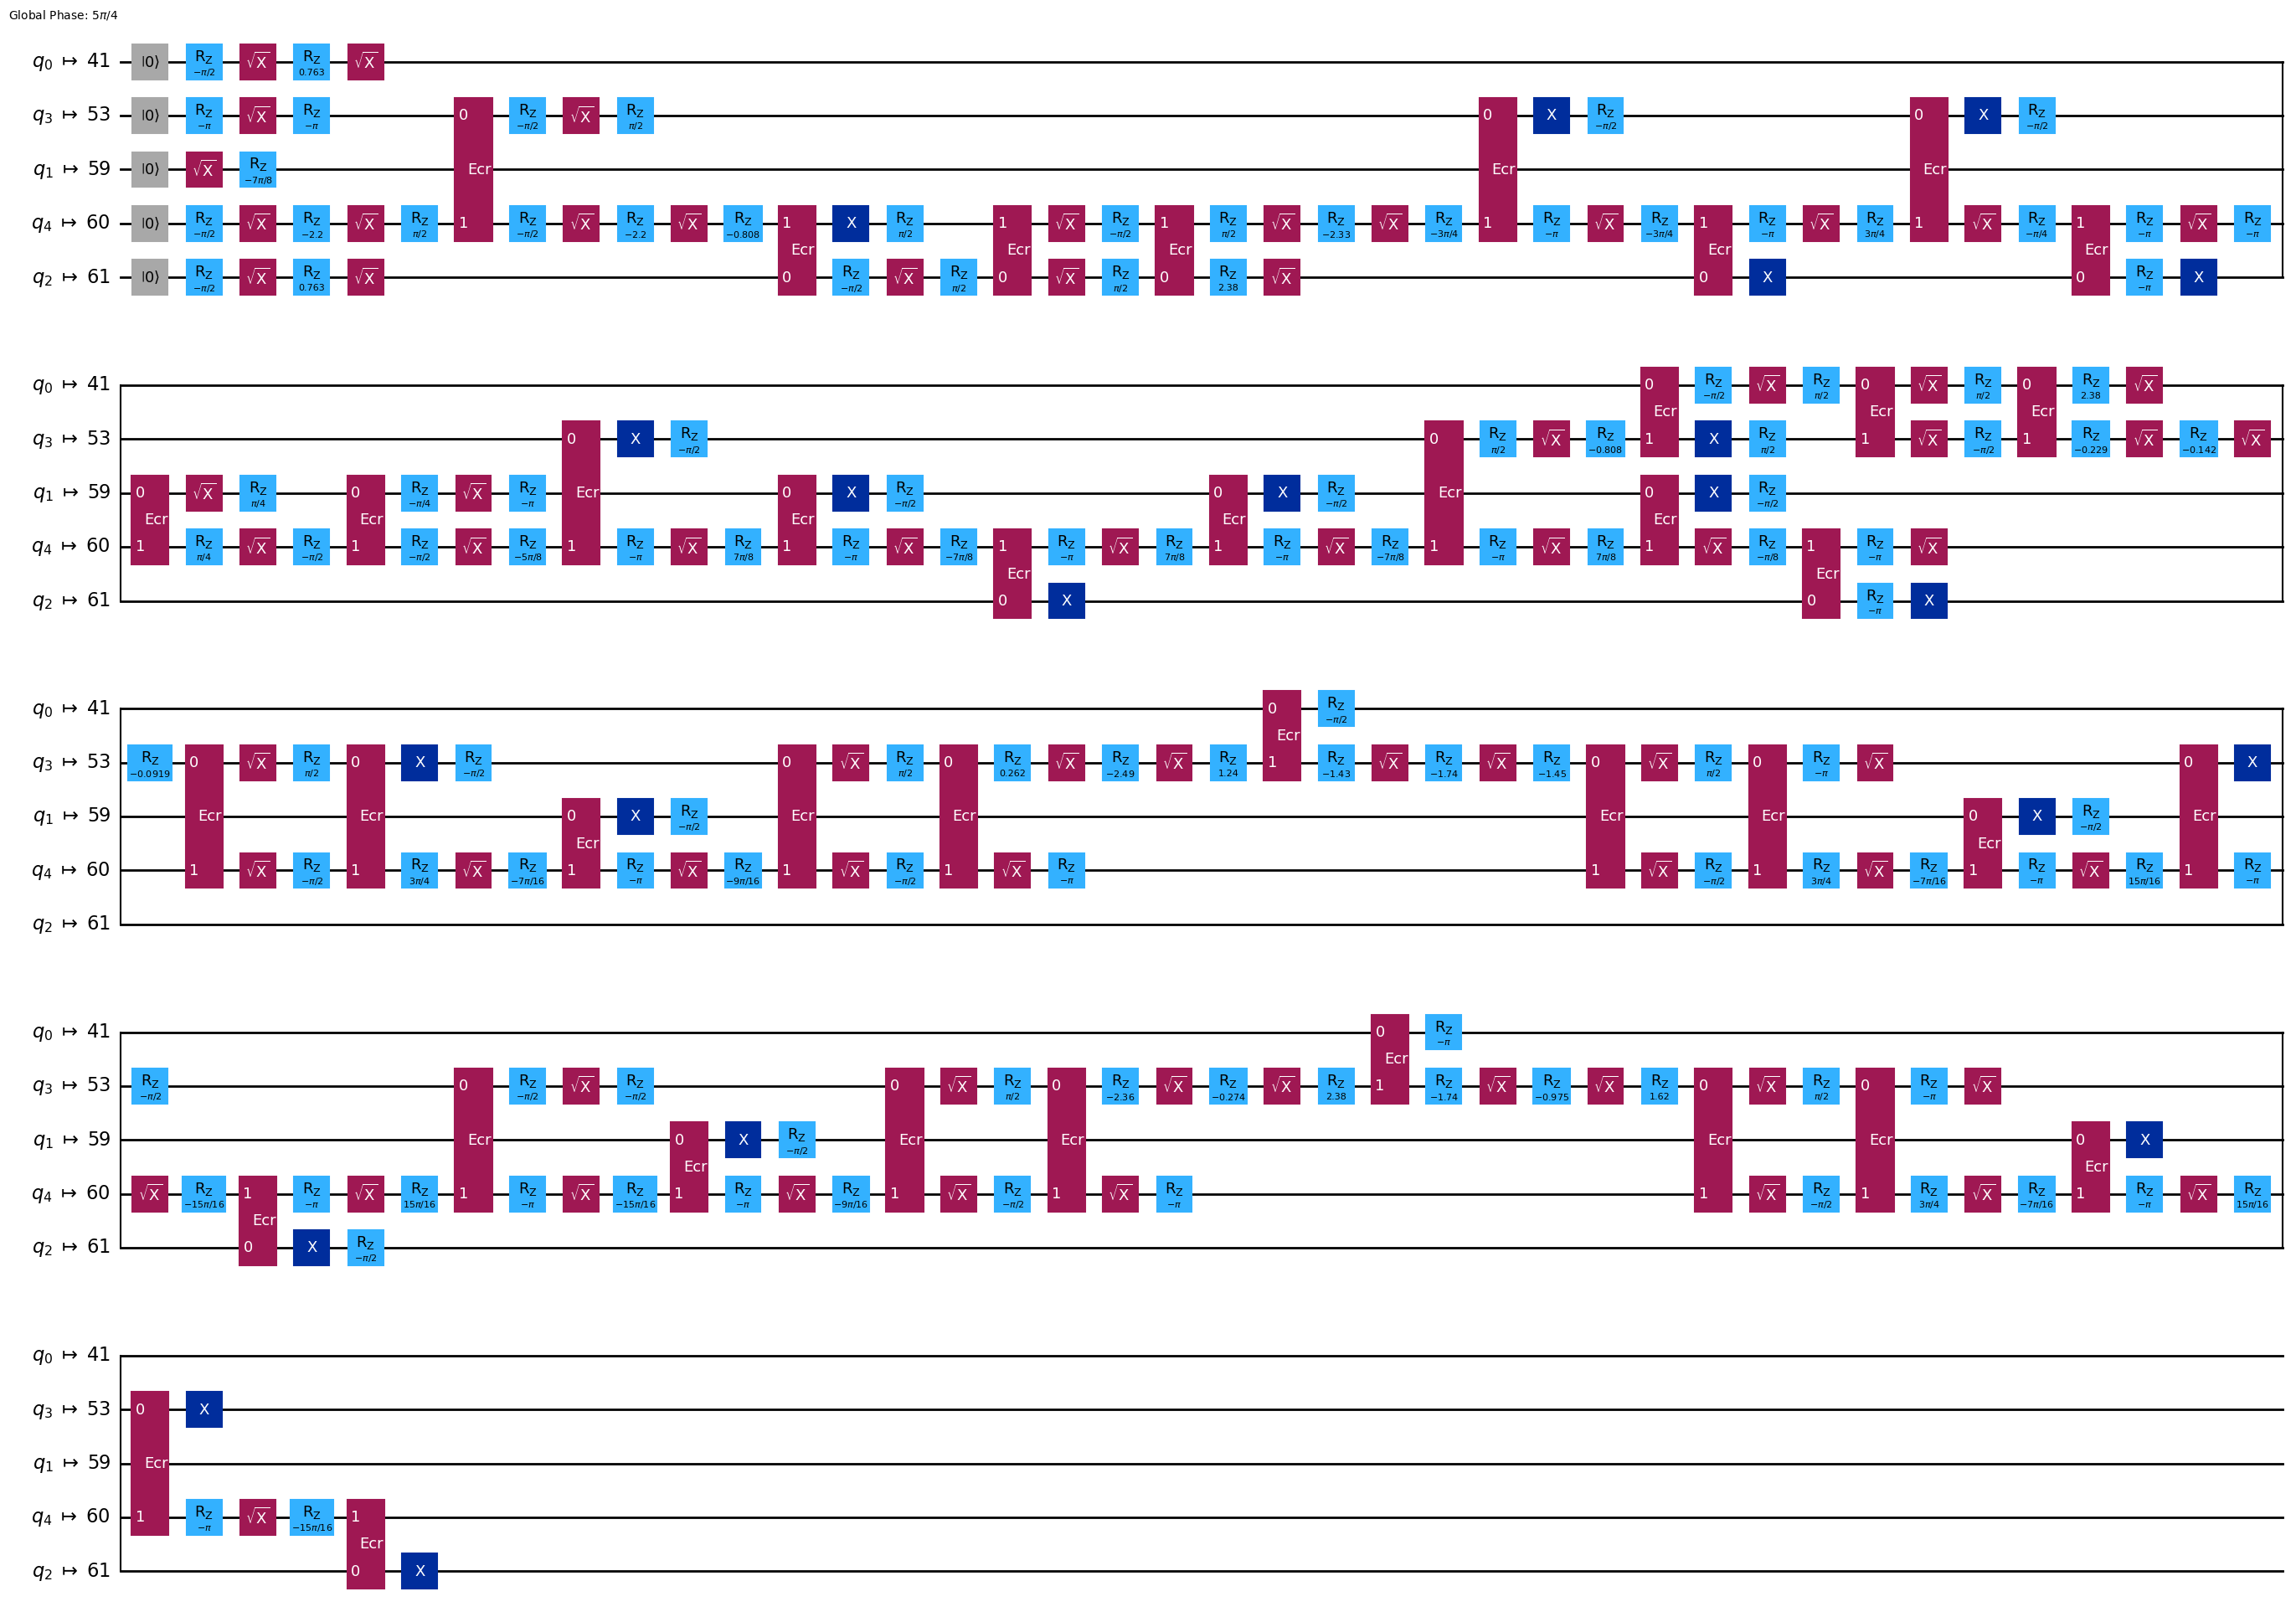

In [ ]:
index_bird = 0 #you can check different birds by changing the index
qc = QuantumCircuit(num_qubits)
qc.initialize(list_coefficients[index_bird])
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", idle_wires=False, fold=40)

In [ ]:
def amplitude_embedding(num_qubits, bird_index):
    """Create amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    def generate_GHZ(qc):
        qc.h(0)
        for i, j in zip(range(num_qubits-1), range(1,num_qubits)):
            qc.cx(i, j)

    ### Write your code below here ###
    qc = QuantumCircuit(num_qubits)
    if bird_index < 5:
      generate_GHZ(qc)

    bit_str = format(bird_index, '0{0}b'.format(num_qubits))
    for i in reversed(range(len(bit_str))):
      if bit_str[i] == '1':
        qc.x(num_qubits-i-1)



    ### Don't change any code past this line ###
    return qc

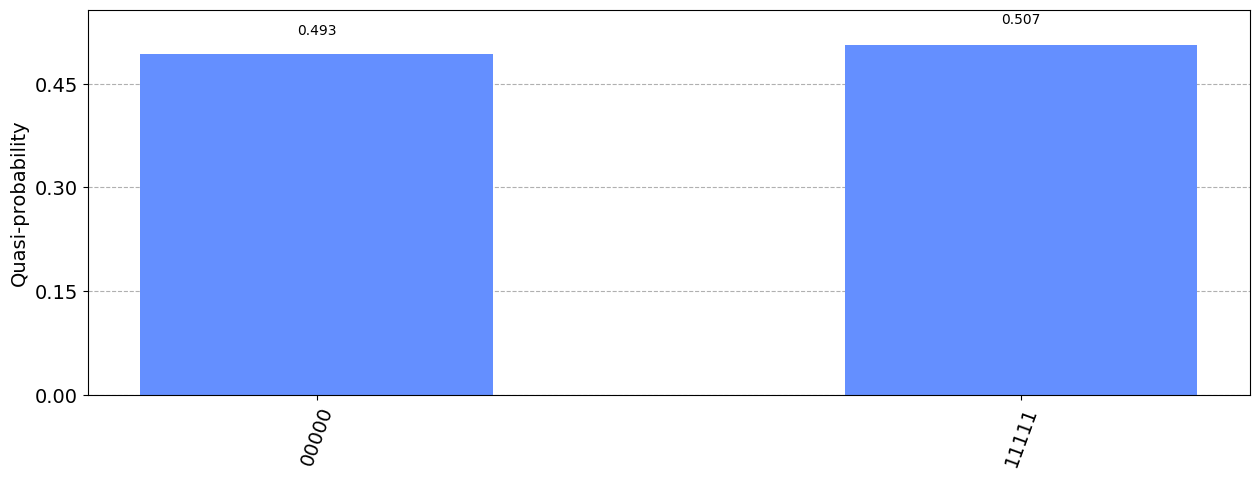

In [ ]:
index_bird = 0 # You can check different birds by changing the index

# Build the amplitude embedding
qc = amplitude_embedding(num_qubits, index_bird)
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(15, 5))

Depth of two-qubit gates:  4


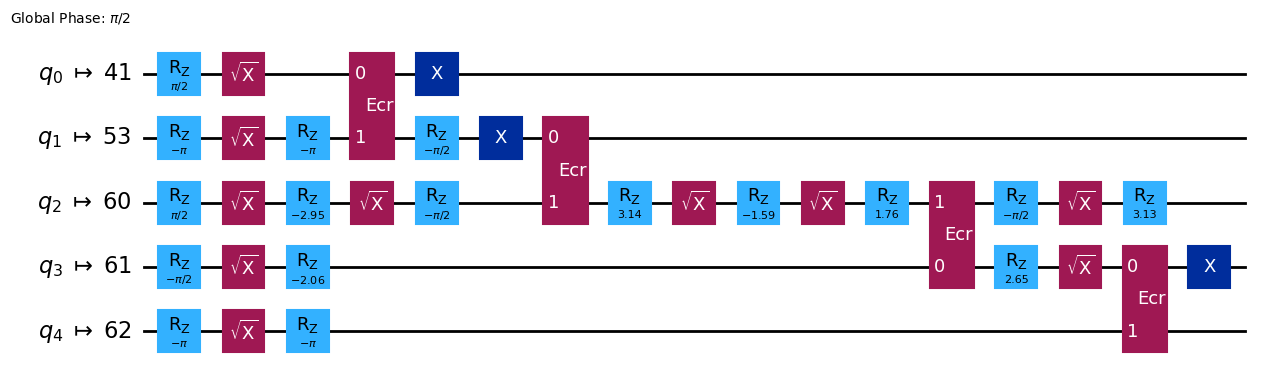

In [ ]:
index_bird = 0 #You can check different birds by changing the index
qc = amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

In [ ]:
# Submit your answer using following code
grade_lab4_ex5(amplitude_embedding) # Expected answer type Callable

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Depth of two-qubit gates:  16


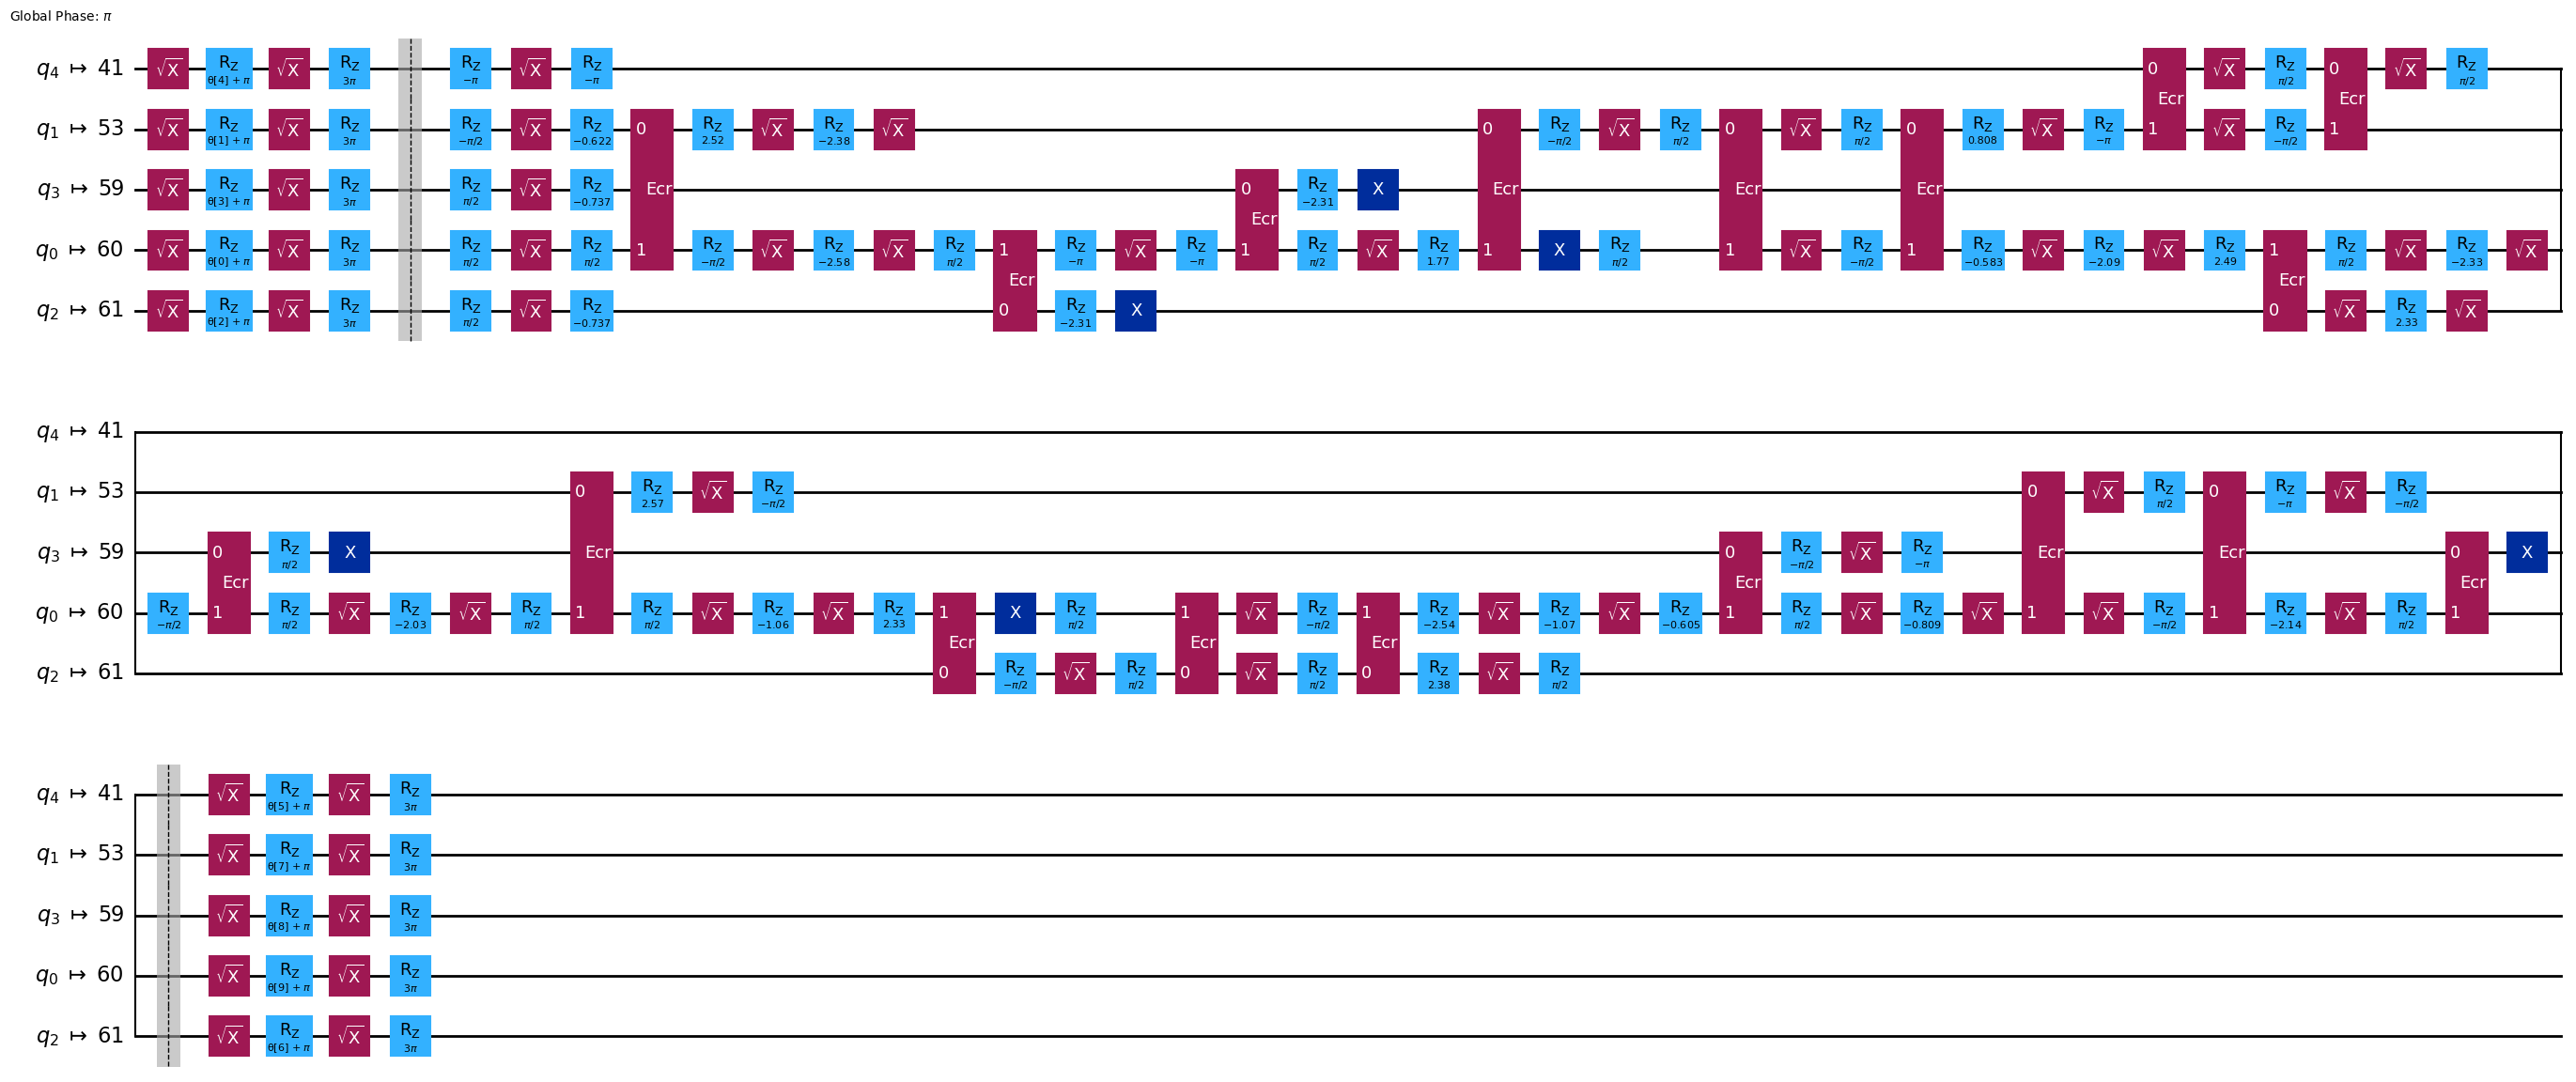

In [ ]:
old_ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='full', insert_barriers=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz = pm.run(old_ansatz)

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", idle_wires=False, fold=40)

Depth of two-qubit gates:  2


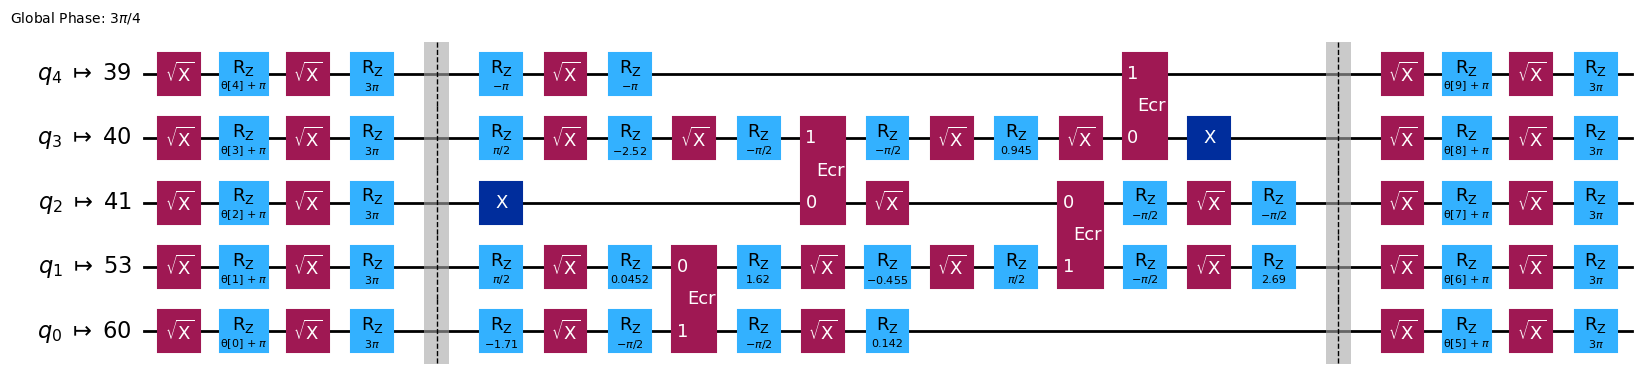

In [ ]:
ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='pairwise', insert_barriers=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz = pm.run(ansatz)

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", fold=False, idle_wires=False)

In [ ]:
old_mapping = QuantumCircuit(num_qubits)
old_mapping.initialize(list_coefficients[index_bird])
old_classifier = old_mapping.compose(old_ansatz)

new_mapping = amplitude_embedding(num_qubits, index_bird)
new_classifier = new_mapping.compose(ansatz)

pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
old_transpiled_classifier = pm.run(old_classifier)
new_transpiled_classifier = pm.run(new_classifier)

print('Old depth of two-qubit gates: ', old_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))
print('Current depth of two-qubit gates: ', new_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))

Old depth of two-qubit gates:  66
Current depth of two-qubit gates:  6


In [ ]:
def test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm):

    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        results_test (list): List of test results
    """
    ### Write your code below here ###
    results_test = []
    cost = 0
    for bird_index,label in enumerate(list_labels):
        new_mapping = amplitude_embedding(num_qubits, bird_index)
        classifier = new_mapping.compose(ansatz)

        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])
        result = job.result()[0].data.evs
        cost += np.abs(result - label)
        results_test.append(abs(result))

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = opt_params



    ### Don't change any code past this line ###
    return results_test

Performance: 97.49755859375


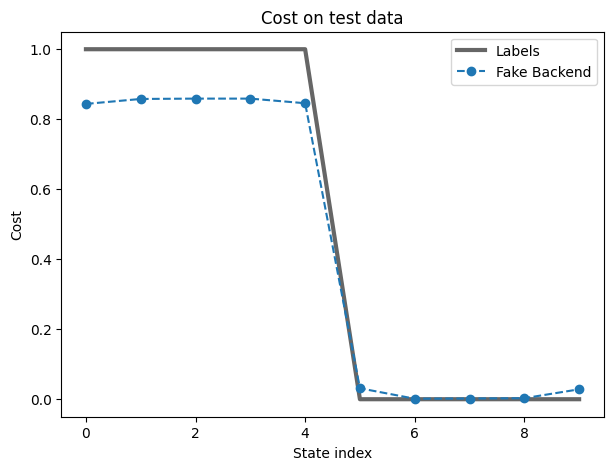

In [ ]:
estimator = Estimator(backend=fake_backend)
estimator.options.default_shots = 5000
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)

opt_params = np.load('opt_params_shallow_VQC.npy') # Load optimal parameters
results_test = test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm)

print(f"Performance: {compute_performance(results_test, list_labels)}")

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')
ax.plot(results_test, 'o--', label='Fake Backend')
ax.legend()

In [ ]:
# Submit your answer using following code
grade_lab4_ex6(results_test) # Expected answer type: list[float]

Submitting your answer. Please wait...
Failed: 401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken


In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")

In [ ]:
def test_shallow_VQC_QPU(list_labels, ansatz, obs, opt_params, options, backend):

    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Estimator options
        backend (service.backend): Backend to run the job

    Returns:
        job_id (str): Job ID
    """

    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    pubs = []
    for bird, label in enumerate(list_labels):
        qc = QuantumCircuit(ansatz.num_qubits)
        # Amplitude embedding
        qc.initialize([1.0] * ansatz.num_qubits, range(ansatz.num_qubits))
        classifier = qc.compose(ansatz)
        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        pubs.append(pub)

        ### Don't change any code past this line ###
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        pubs.append(pub)

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    return job_id

In [ ]:
## No DD, no TREX (no ZNE)
options_0 = EstimatorOptions(
    default_shots = 5000,
    optimization_level=0,
    resilience_level = 0,
    twirling = {'enable_measure':False},
    dynamical_decoupling ={
        'enable': False,
        'sequence_type':"XpXm"
            })
## DD + TREX (no ZNE)

options_1 = EstimatorOptions(
    default_shots = 5000,
    optimization_level=0,
    resilience_level = 1,
    twirling = {'enable_measure':True},
    dynamical_decoupling ={
        'enable': True,
        'sequence_type':"XpXm"
            })

In [ ]:
# Submit your answer using following code
grade_lab4_ex7(options_0, options_1) # Expected answer type: EstimatorOptions, EstimatorOptions

TypeError: Object of type UnsetType is not JSON serializable